In [1]:
# import needed libraries
import numpy as np 
import cv2 
import os 
from PIL import Image
import keras

# Importing data 

In [4]:
images_directory = 'processes_data_230files_2filters_2classes/'    # directory to folder with dataset
dataset=[]                             # list to keep the images
labels = []                            # list to keep the values of the labels
SIZE = 150

positive_images = os.listdir(images_directory + 'positive/')
for i, image_name in enumerate(positive_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(images_directory + 'positive/' +image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        labels.append(0)
        
negative_images = os.listdir(images_directory + 'negative/')
for i, image_name in enumerate(negative_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(images_directory + 'negative/' +image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        labels.append(1)
    

# Building model 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [6]:
channels = 3
img_shape = (150, 150, channels)

model = Sequential()

# convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))    #droping out 30% of data to minimize overfitting

# convolutional layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))    #droping out 30% of data to minimize overfitting

#flattening
model.add(Flatten())

#Flatten the matrix to get it ready for den
model.add(Dense(64,activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

#output layer
model.add(Dense(2, activation = "softmax"))

In [7]:
model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0

# training and evaluating model

Epoch 1/10


2024-04-29 15:32:35.359736: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


17/17 [==============================] - 1s 50ms/step - loss: 0.7947 - accuracy: 0.7037 - val_loss: 19.4290 - val_accuracy: 0.4444
Epoch 2/10
17/17 [==============================] - 1s 44ms/step - loss: 0.5333 - accuracy: 0.7778 - val_loss: 8.1599 - val_accuracy: 0.5000
Epoch 3/10
17/17 [==============================] - 1s 45ms/step - loss: 0.1876 - accuracy: 0.9198 - val_loss: 2.8335 - val_accuracy: 0.6111
Epoch 4/10
17/17 [==============================] - 1s 45ms/step - loss: 0.2625 - accuracy: 0.9383 - val_loss: 0.7454 - val_accuracy: 0.7778
Epoch 5/10
17/17 [==============================] - 1s 50ms/step - loss: 0.2121 - accuracy: 0.9444 - val_loss: 0.5592 - val_accuracy: 0.7778
Epoch 6/10
17/17 [==============================] - 1s 45ms/step - loss: 0.2098 - accuracy: 0.9074 - val_loss: 0.5846 - val_accuracy: 0.7778
Epoch 7/10
17/17 [==============================] - 1s 45ms/step - loss: 0.1169 - accuracy: 0.9568 - val_loss: 0.8887 - val_accuracy: 0.7778
Epoch 8/10
17/17 [=====

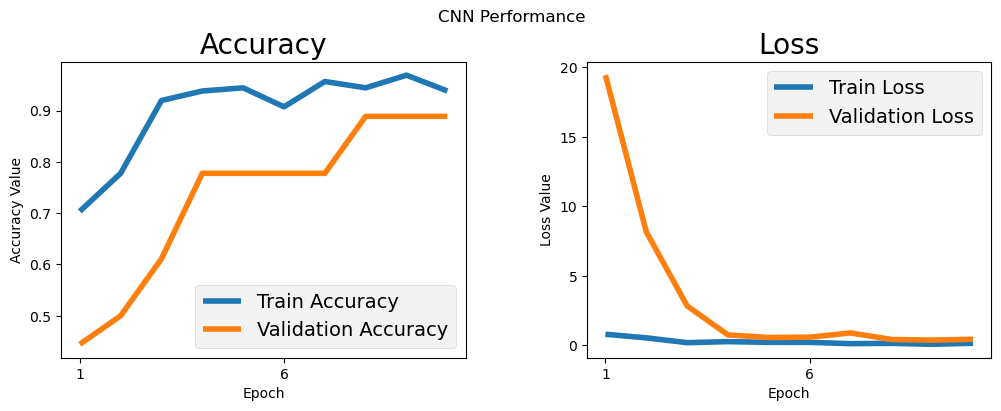

In [8]:
# fit the data to the model

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(dataset,     #list with images
                                                    to_categorical(np.array(labels)),  #converting array to binary class matrix
                                                    test_size= 0.20, 
                                                    random_state= 0)
#fitting the model
history = model.fit(np.array(X_train), y_train, 
                    batch_size =10, verbose=1, 
                    epochs=10, validation_split=0.1, 
                   shuffle=True)

model.save('CNN_120424vol1.hdf5')

print( "Test_Accuracy: {:.2f}%". format (model. evaluate(np.array(X_test), np. array(y_test)) [1]*100))

f,(ax1, ax2) = plt. subplots(1, 2, figsize=(12, 4))
plt.style.use('fivethirtyeight')
t = f.suptitle('CNN Performance', fontsize=12)
f. subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch) )
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel( 'Accuracy Value')
ax1.set_xlabel( 'Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label= 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on test data
predicted_probs = model.predict(np.array(X_test))
predicted_labels = np.argmax(predicted_probs, axis=1)

# Convert one-hot encoded true labels back to categorical labels
true_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

2/2 [==============================] - 0s 18ms/step
Confusion Matrix:
[[17  7]
 [ 2 19]]


# adding image data generator 

In [10]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 3

train_datagen = ImageDataGenerator()

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'processed_data/Training',  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 120x120
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'processed_data/Testing',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 177 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


# fitting model with augmented data

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_augmented = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

Epoch 1/10


2024-04-29 15:32:51.372913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


59/59 [==============================] - 2s 23ms/step - loss: 1.1293 - accuracy: 0.5537 - val_loss: 1.8585 - val_accuracy: 0.6458
Epoch 2/10
 1/59 [..............................] - ETA: 1s - loss: 0.0896 - accuracy: 1.0000

2024-04-29 15:32:52.754697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


59/59 [==============================] - 1s 22ms/step - loss: 0.7745 - accuracy: 0.6723 - val_loss: 0.5302 - val_accuracy: 0.8333
Epoch 3/10
59/59 [==============================] - 1s 23ms/step - loss: 0.5601 - accuracy: 0.7401 - val_loss: 0.5080 - val_accuracy: 0.7917
Epoch 4/10
59/59 [==============================] - 1s 23ms/step - loss: 0.6851 - accuracy: 0.6836 - val_loss: 0.5185 - val_accuracy: 0.7500
Epoch 5/10
59/59 [==============================] - 1s 24ms/step - loss: 0.5425 - accuracy: 0.7627 - val_loss: 0.4694 - val_accuracy: 0.8750
Epoch 6/10
59/59 [==============================] - 1s 23ms/step - loss: 0.5797 - accuracy: 0.7458 - val_loss: 0.4613 - val_accuracy: 0.7917
Epoch 7/10
59/59 [==============================] - 1s 23ms/step - loss: 0.5786 - accuracy: 0.7175 - val_loss: 0.6148 - val_accuracy: 0.7500
Epoch 8/10
59/59 [==============================] - 1s 24ms/step - loss: 0.5977 - accuracy: 0.7175 - val_loss: 0.8534 - val_accuracy: 0.6458
Epoch 9/10
59/59 [======

# evaluation of the model with augmented data

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

16/16 [==============================] - 0s 7ms/step - loss: 1.1019 - accuracy: 0.6250
Test Accuracy: 62.50%
Test Loss: 1.1018974781036377


2024-04-29 15:33:05.361564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


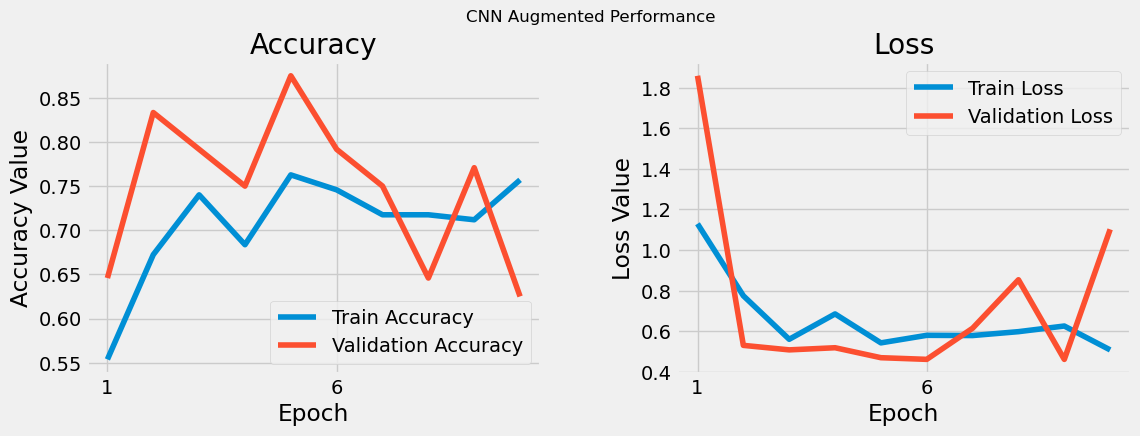

In [13]:
f,(ax1, ax2) = plt. subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Augmented Performance', fontsize=12)
f. subplots_adjust(top=0.85, wspace=0.3)

max_epoch1 = len(history_augmented.history['accuracy'])+1
epoch_list1 = list(range(1, max_epoch1) )
ax1.plot(epoch_list1, history_augmented.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list1, history_augmented.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch1, 5))
ax1.set_ylabel( 'Accuracy Value')
ax1.set_xlabel( 'Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list1, history_augmented.history['loss'], label='Train Loss')
ax2.plot(epoch_list1, history_augmented.history['val_loss'], label= 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.show()

16/16 [==============================] - 0s 7ms/step


2024-04-29 15:33:05.711920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


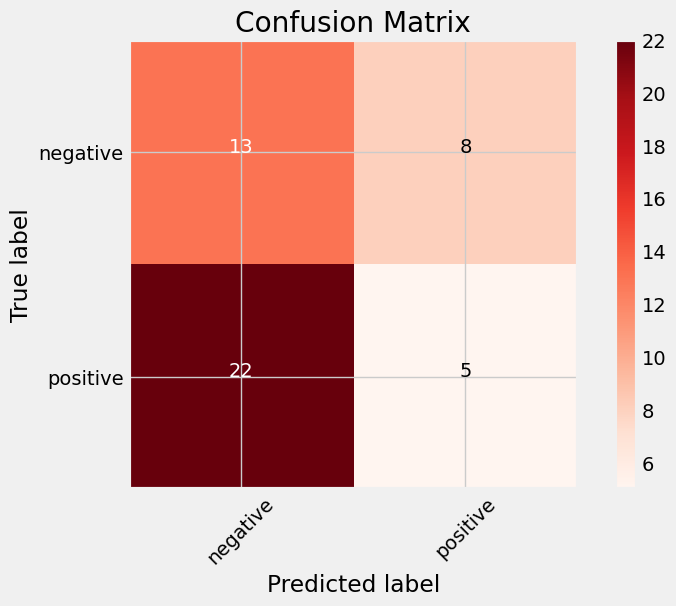

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


# Get the true labels
true_labels = validation_generator.classes

# Get the predicted labels
predicted_probs = model.predict(validation_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(validation_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Print the confusion matrix values
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Rationale for modifying model architecture: 

Multiple convolutional layers with dropout and batch normalization layers can increase model's ability to learn complex patterns; however, with small datasets it introduces complexity and potentially overfitting. The decision to reduce the number of convolutional layers is based on the observations that the initial layers were extracting less relevant features. By simplifying the architecture, the model can concentrate on extracting the most important features for classification, potentially leading to better performance on the dataset.

The new architecture with smaller dense layers is better suited for capturing relevant features from the input data. By introducing multiple layers with fewer neurons, the model can learn hierarchical representations of the data, potentially improving its ability to discriminate between different classes, which should reduce bias. Smaller dense layers with fewer neurons lead to more interpretable representations in the learned features. This can make it easier to understand and analyze how the model makes predictions, which is important for tasks where interpretability is desired, such as in medical diagnosis with MRI images.

The loss function type is set to categorical cross entropy. Categorical cross-entropy loss is typically used for multi-class classification problems, where each sample belongs to one and only one class. - in my case: the image indicates presence or absence of the brain tumour.



In [15]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adamax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# changing layers in CNN with new hyper-parameters

In [16]:
channels = 3
img_shape = (150, 150, channels)


class_count = len(list(train_generator.class_indices.keys())) # to define number of classes in dense layer

model_new = Sequential()

model_new.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model_new.add(MaxPooling2D())
    
model_new.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_new.add(MaxPooling2D())
    
model_new.add(Flatten())
    
model_new.add(Dense(64,activation = "relu"))
model_new.add(Dense(32,activation = "relu"))
model_new.add(Dense(class_count, activation = "softmax"))

In [17]:
model_new.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# fitting new model with augmented data

In [18]:
epochs = 10   # number of all epochs in training

history_new = model_new.fit(train_generator, epochs= epochs, verbose= 1, validation_data= validation_generator, shuffle= False)

Epoch 1/10


2024-04-29 15:33:31.315517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


59/59 [==============================] - 1s 23ms/step - loss: 32.3026 - accuracy: 0.6384 - val_loss: 0.7427 - val_accuracy: 0.7083
Epoch 2/10
 1/59 [..............................] - ETA: 1s - loss: 0.4358 - accuracy: 1.0000

2024-04-29 15:33:32.667646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


59/59 [==============================] - 1s 22ms/step - loss: 0.4887 - accuracy: 0.8362 - val_loss: 0.5946 - val_accuracy: 0.7917
Epoch 3/10
59/59 [==============================] - 1s 24ms/step - loss: 0.3586 - accuracy: 0.8757 - val_loss: 0.5902 - val_accuracy: 0.7292
Epoch 4/10
59/59 [==============================] - 1s 22ms/step - loss: 0.1398 - accuracy: 0.9435 - val_loss: 0.9007 - val_accuracy: 0.7500
Epoch 5/10
59/59 [==============================] - 1s 22ms/step - loss: 0.0866 - accuracy: 0.9718 - val_loss: 1.0236 - val_accuracy: 0.7292
Epoch 6/10
59/59 [==============================] - 1s 23ms/step - loss: 0.3375 - accuracy: 0.9831 - val_loss: 0.8894 - val_accuracy: 0.7083
Epoch 7/10
59/59 [==============================] - 1s 23ms/step - loss: 0.0475 - accuracy: 0.9831 - val_loss: 0.5042 - val_accuracy: 0.8333
Epoch 8/10
59/59 [==============================] - 1s 23ms/step - loss: 0.3142 - accuracy: 0.9718 - val_loss: 2.5749 - val_accuracy: 0.7083
Epoch 9/10
59/59 [======

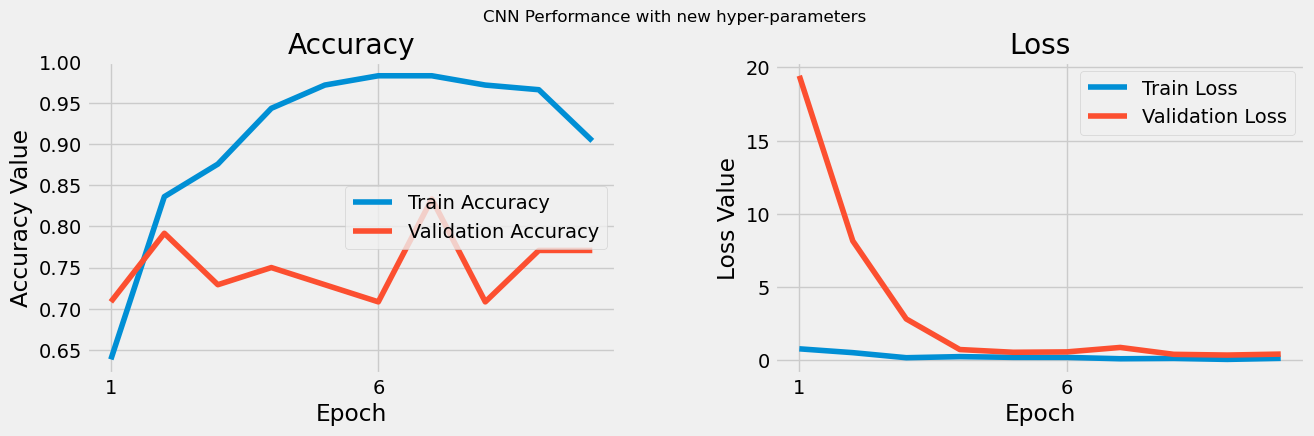

In [19]:
f,(ax1, ax2) = plt. subplots(1, 2, figsize=(14, 4))
t = f.suptitle('CNN Performance with new hyper-parameters', fontsize=12)
f. subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history_new.history['accuracy'])+1
epoch_list = list(range(1, max_epoch) )
ax1.plot(epoch_list, history_new.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_new.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel( 'Accuracy Value')
ax1.set_xlabel( 'Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label= 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_new.evaluate(validation_generator, steps=len(validation_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

16/16 [==============================] - 0s 7ms/step - loss: 1.1682 - accuracy: 0.7708
Test Accuracy: 77.08%
Test Loss: 1.1682311296463013


2024-04-29 15:33:53.692385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


# Scaling up to 7k images

In [21]:
# import needed libraries
import numpy as np 
import cv2 
import os 
from PIL import Image
import keras
import pandas as pd

images_directory = 'processed_data_7k_2filters_4classes/Training'    # directory to folder with dataset
filepaths=[]                             # list to keep the images paths
labels = []                            # list to keep the values of the labels

# Get folders names
folds = os.listdir(images_directory)

for fold in folds:
    foldpath = os.path.join(images_directory, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        filepath = os.path.join(foldpath, file)
        
        filepaths.append(filepath)
        labels.append(fold)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [22]:
train_df.shape

(5712, 2)

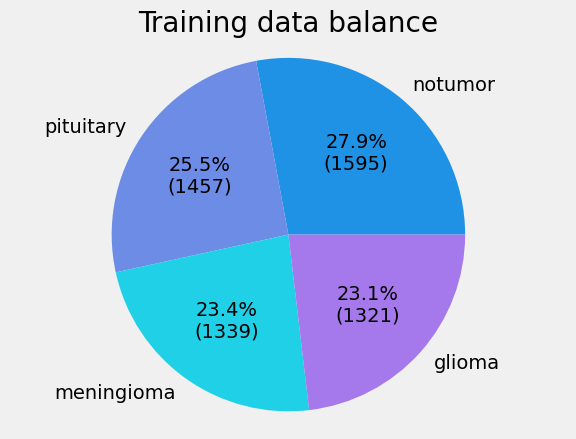

In [23]:
import matplotlib.pyplot as plt

data_balance = train_df.labels.value_counts()

def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_balance, labels = data_balance.index, autopct=custom_autopct, colors = ["#2092E6","#6D8CE6","#20D0E6","#A579EB"])
plt.title("Training data balance")
plt.axis("equal")
plt.show()

In [26]:
# Generate data paths with labels
train_data_dir = 'processed_data_7k_2filters_4classes/Testing'
filepaths = []
labels = []

# Get folders names
folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [27]:
ts_df

,filepaths,labels
0,processed_data_7k_2filters_4classes/Testing/pi...,pituitary
1,processed_data_7k_2filters_4classes/Testing/pi...,pituitary
2,processed_data_7k_2filters_4classes/Testing/pi...,pituitary
3,processed_data_7k_2filters_4classes/Testing/pi...,pituitary
4,processed_data_7k_2filters_4classes/Testing/pi...,pituitary
...,...,...
1306,processed_data_7k_2filters_4classes/Testing/me...,meningioma
1307,processed_data_7k_2filters_4classes/Testing/me...,meningioma
1308,processed_data_7k_2filters_4classes/Testing/me...,meningioma
1309,processed_data_7k_2filters_4classes/Testing/me...,meningioma


In [28]:
from sklearn.model_selection import train_test_split

# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 42)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (150, 150)

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = test_datagen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = test_datagen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


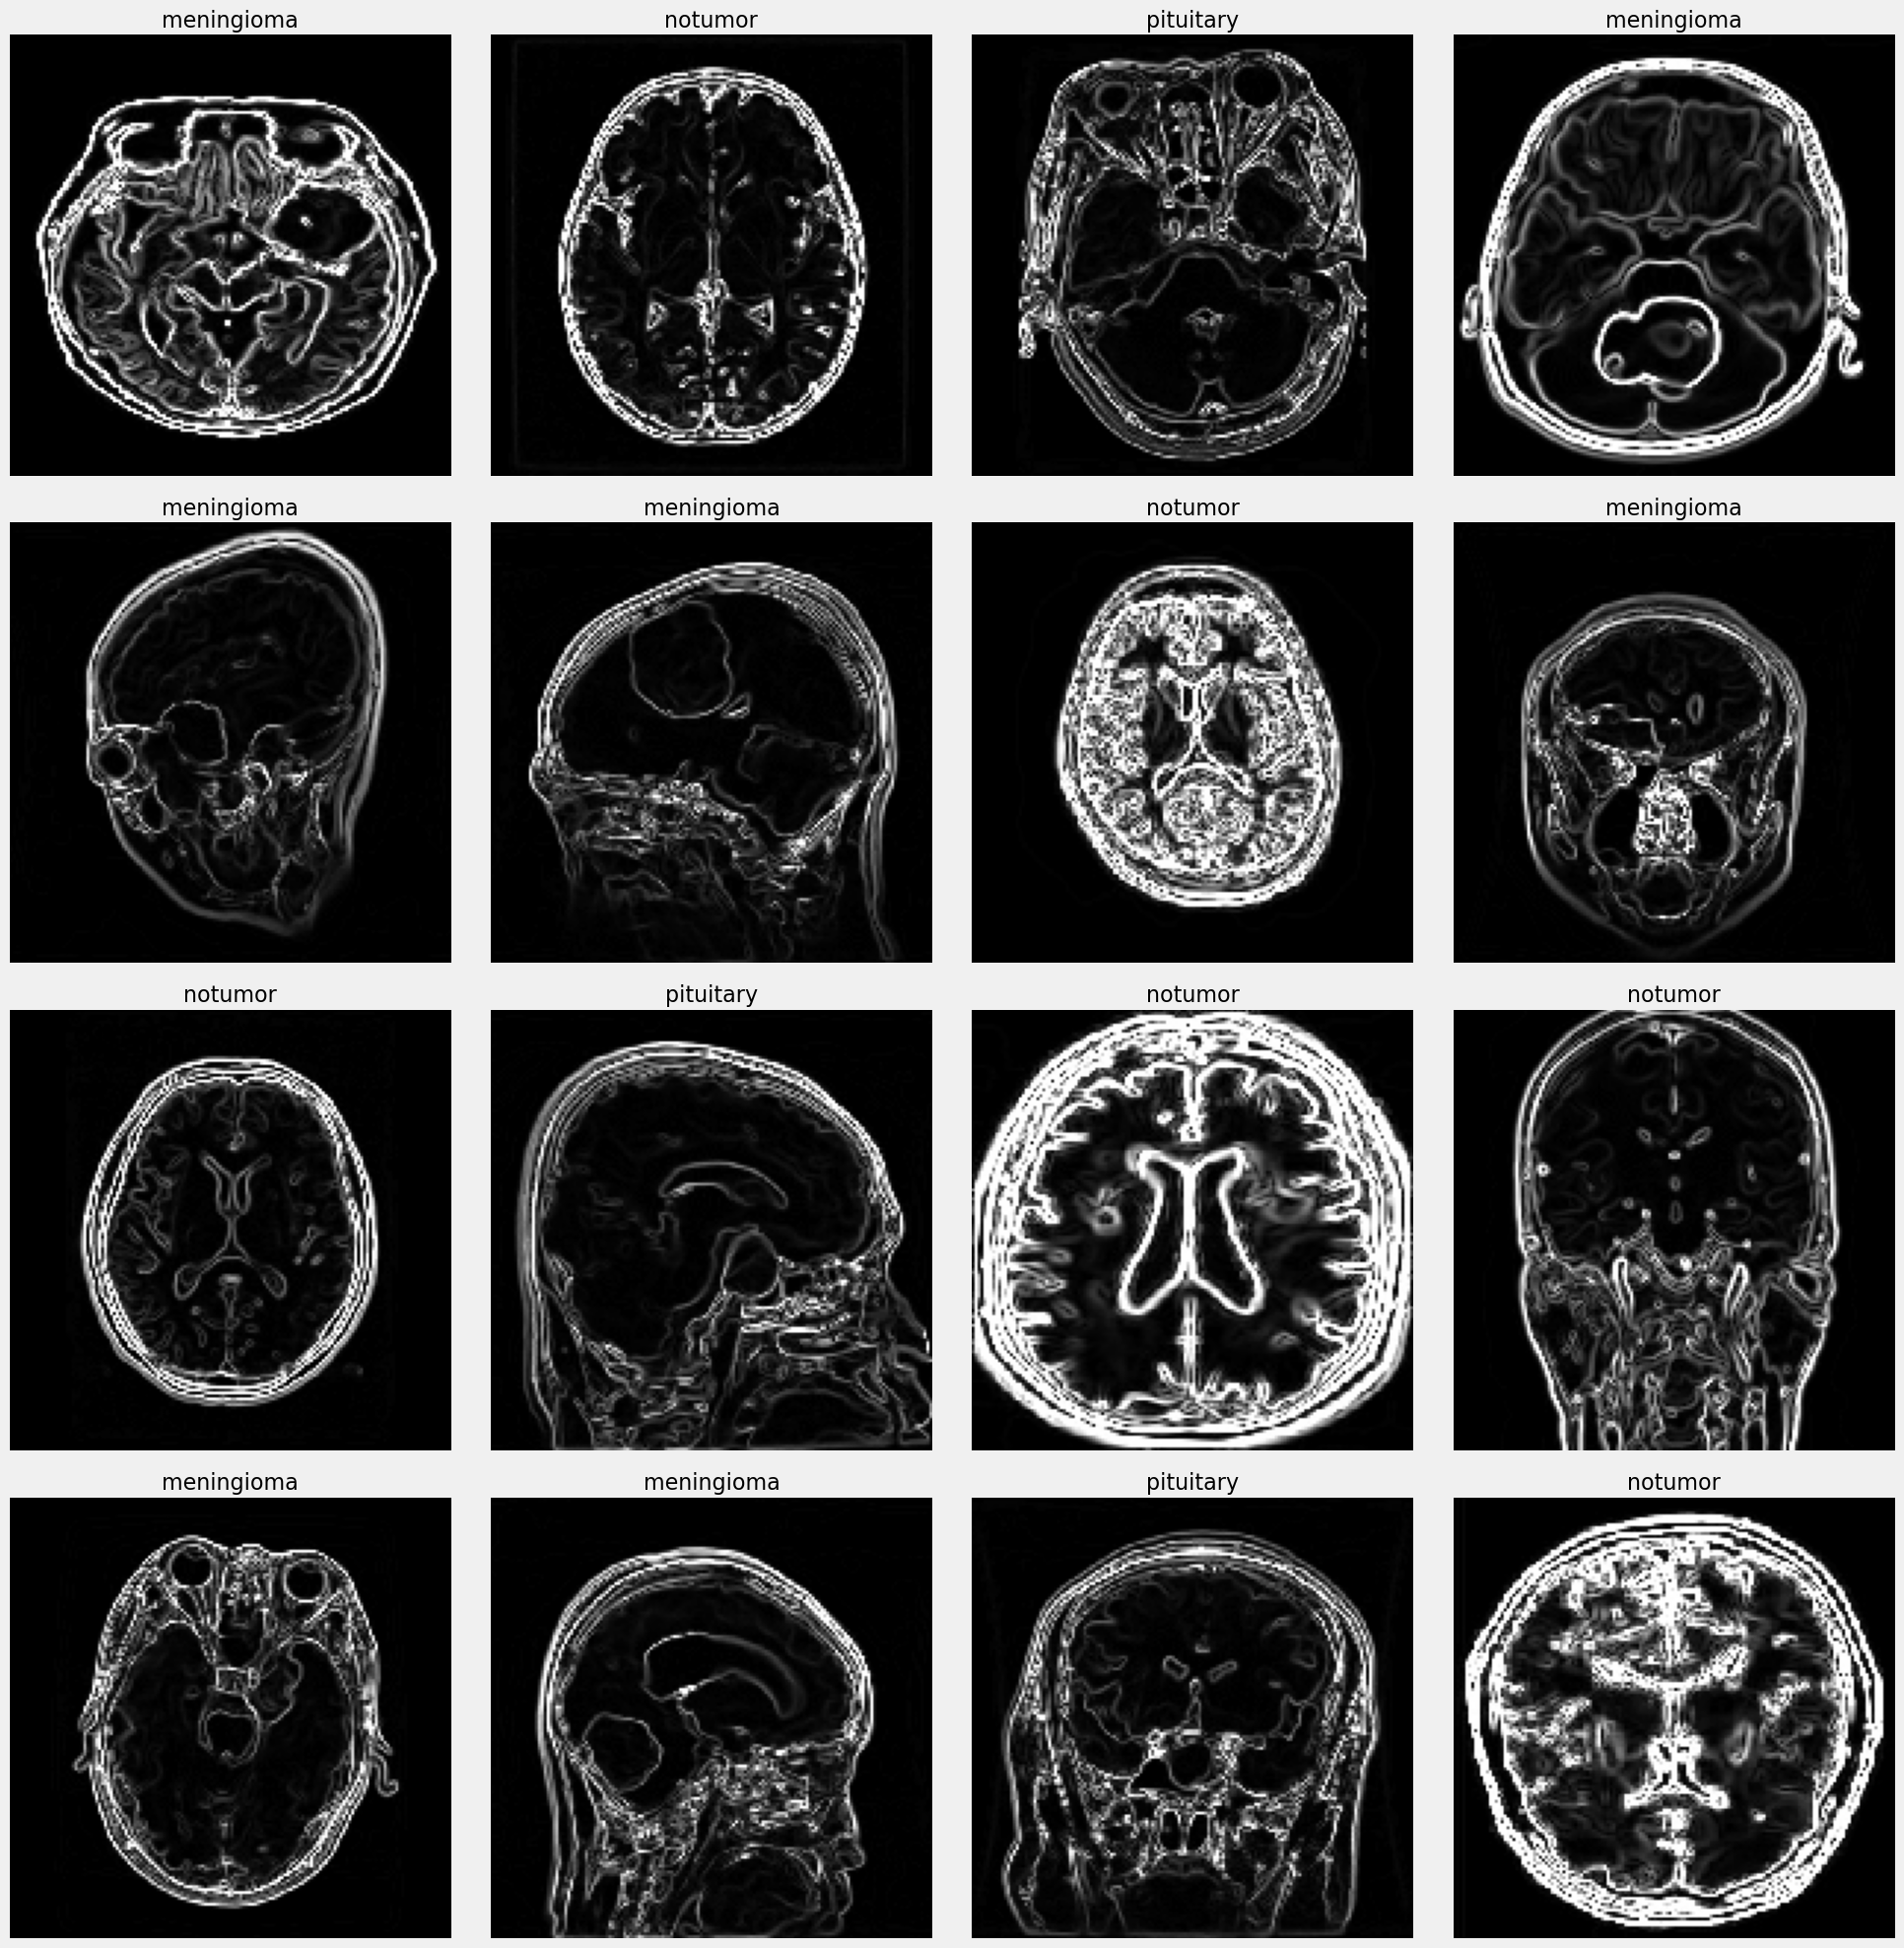

In [30]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Training model with 7k images dataset

In [31]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
channels = 3
img_shape = (150, 150, channels)


class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model_7k = Sequential()

model_7k.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model_7k.add(MaxPooling2D())
    
model_7k.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_7k.add(MaxPooling2D())
    
model_7k.add(Flatten())
    
model_7k.add(Dense(64,activation = "relu"))
model_7k.add(Dense(32,activation = "relu"))
model_7k.add(Dense(class_count, activation = "softmax"))

In [33]:
model_7k.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_7k.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 87616)             0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [34]:
epochs = 10   # number of all epochs in training

history_7k = model_7k.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10


2024-04-29 15:35:08.443715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


357/357 [==============================] - ETA: 0s - loss: 4.9781 - accuracy: 0.7808

2024-04-29 15:35:34.384695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


357/357 [==============================] - 27s 75ms/step - loss: 4.9781 - accuracy: 0.7808 - val_loss: 0.4452 - val_accuracy: 0.8779
Epoch 2/10
357/357 [==============================] - 27s 76ms/step - loss: 0.1462 - accuracy: 0.9571 - val_loss: 0.2271 - val_accuracy: 0.9252
Epoch 3/10
357/357 [==============================] - 26s 73ms/step - loss: 0.0490 - accuracy: 0.9834 - val_loss: 0.1861 - val_accuracy: 0.9466
Epoch 4/10
357/357 [==============================] - 27s 76ms/step - loss: 0.0447 - accuracy: 0.9883 - val_loss: 0.4813 - val_accuracy: 0.8977
Epoch 5/10
357/357 [==============================] - 27s 74ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.3401 - val_accuracy: 0.9344
Epoch 6/10
357/357 [==============================] - 27s 75ms/step - loss: 0.0223 - accuracy: 0.9939 - val_loss: 0.3680 - val_accuracy: 0.9389
Epoch 7/10
357/357 [==============================] - 26s 74ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.4068 - val_accuracy: 0.9435
Epo

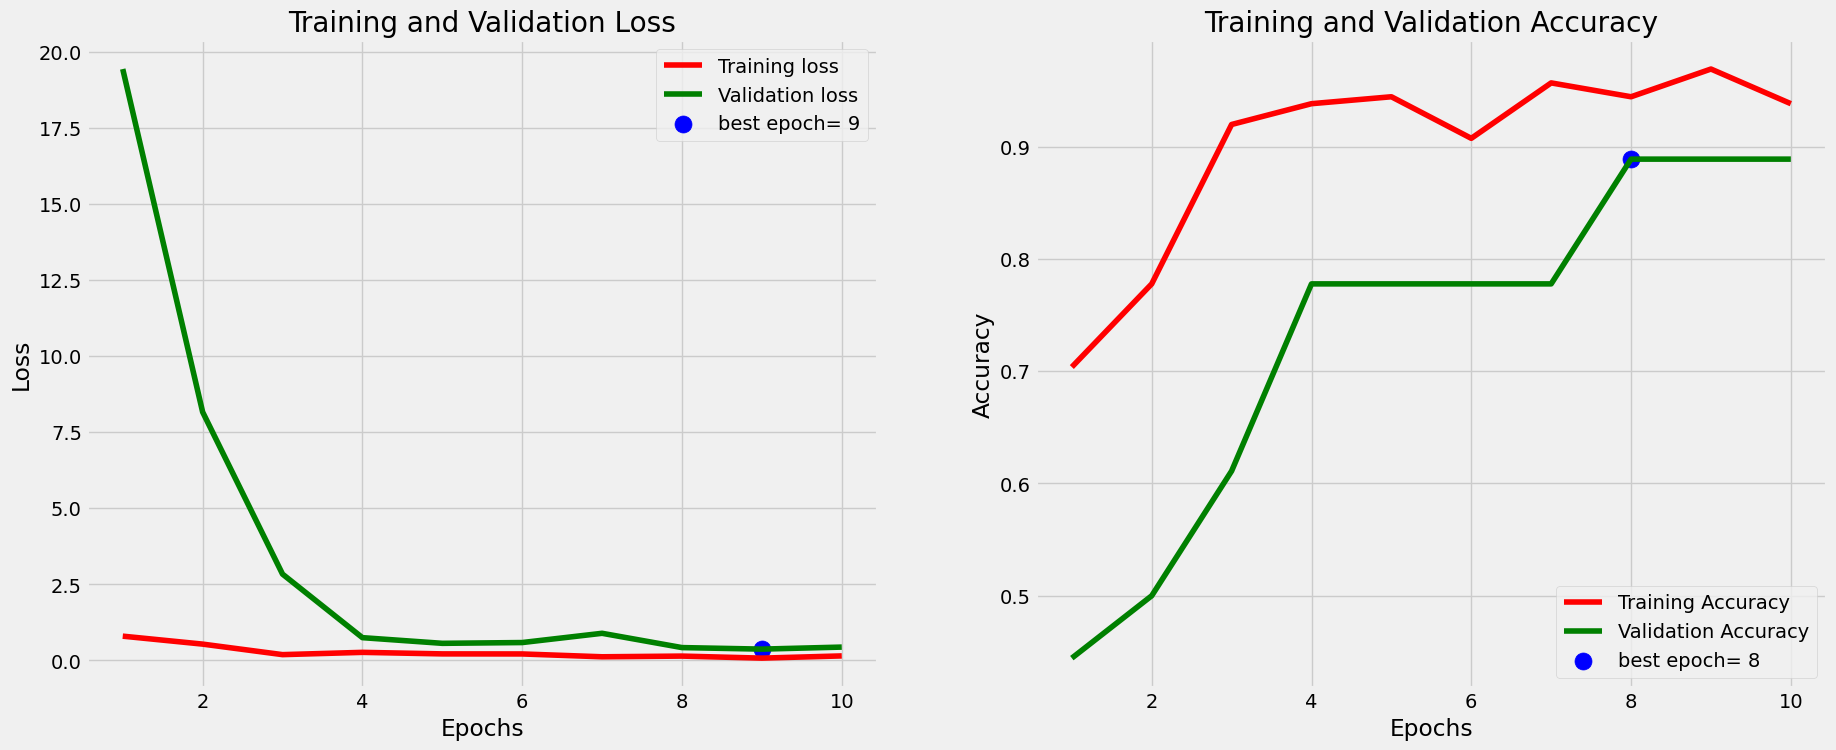

In [35]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [36]:
train_score = model_7k.evaluate(train_gen, verbose= 1)
valid_score = model_7k.evaluate(valid_gen, verbose= 1)
test_score = model_7k.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

  5/357 [..............................] - ETA: 10s - loss: 0.0687 - accuracy: 0.9750

2024-04-29 15:39:36.969003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 5/41 [==>...........................] - ETA: 0s - loss: 0.1088 - accuracy: 0.9625

2024-04-29 15:39:47.114263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 5/41 [==>...........................] - ETA: 1s - loss: 0.6417 - accuracy: 0.9000

2024-04-29 15:39:48.303816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 1s 26ms/step - loss: 0.4017 - accuracy: 0.9223
Train Loss:  0.04995299130678177
Train Accuracy:  0.9851190447807312
--------------------
Validation Loss:  0.42435958981513977
Validation Accuracy:  0.9251908659934998
--------------------
Test Loss:  0.40173786878585815
Test Accuracy:  0.9222561120986938


In [37]:
preds = model_7k.predict(test_gen)  
y_pred = np.argmax(preds, axis=1) 

 5/41 [==>...........................] - ETA: 1s

2024-04-29 15:39:49.451853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 1s 25ms/step


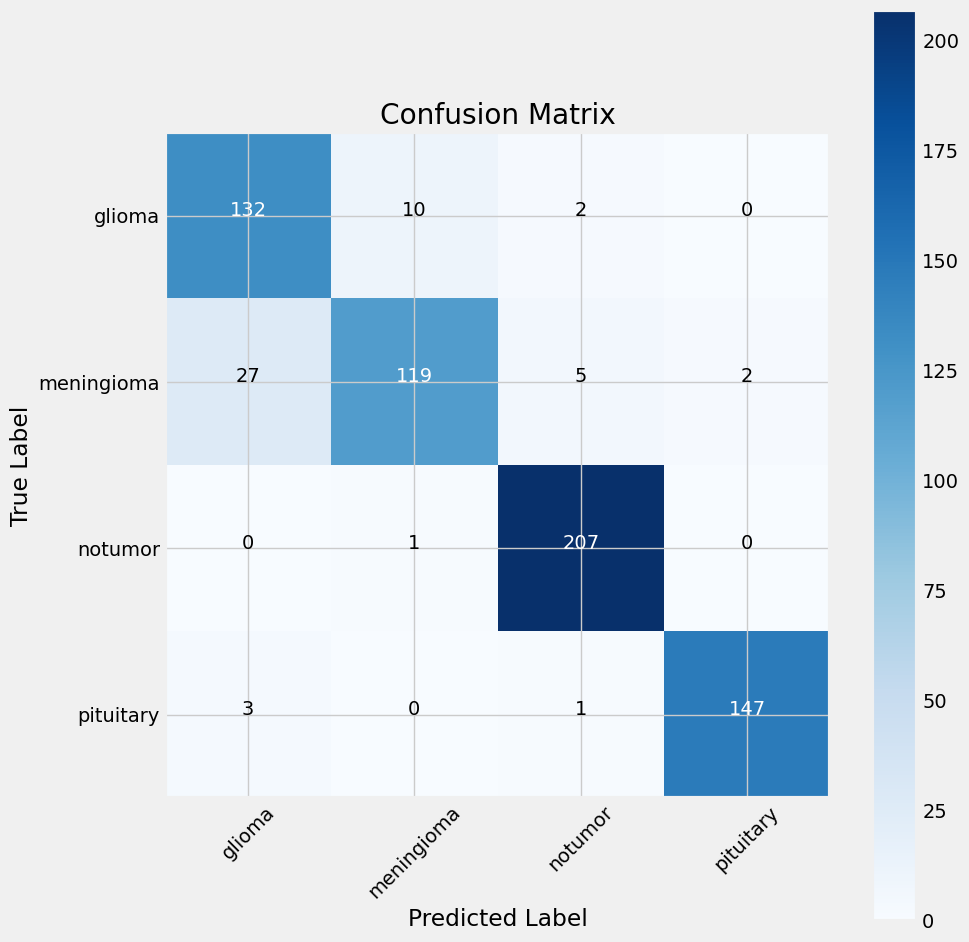

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [39]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes)) 

#Save the model
model.save('saved_models/CNN120424vol3_4classes.h5')

              precision    recall  f1-score   support

      glioma       0.81      0.92      0.86       144
  meningioma       0.92      0.78      0.84       153
     notumor       0.96      1.00      0.98       208
   pituitary       0.99      0.97      0.98       151

    accuracy                           0.92       656
   macro avg       0.92      0.92      0.92       656
weighted avg       0.92      0.92      0.92       656



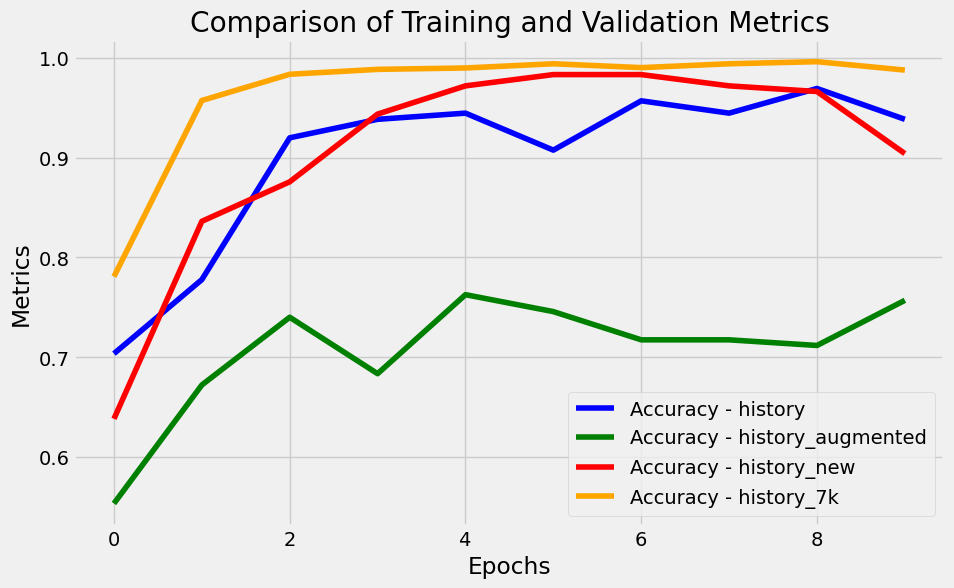

In [40]:
import matplotlib.pyplot as plt

# Define the metrics you want to compare (e.g., accuracy and loss)
metrics = ['accuracy']

# Define the colors for each history
colors = ['blue', 'green', 'red', 'orange']  # Add more colors if needed

# Define the names of the histories
history_names = ['history', 'history_augmented', 'history_new', 'history_7k']

# Plotting
plt.figure(figsize=(10, 6))

# Plot each metric for each history
for i, history in enumerate([history, history_augmented, history_new, history_7k]):
    for j, metric in enumerate(metrics):
        plt.plot(history.history[metric], label=f'{metric.capitalize()} - {history_names[i]}', color=colors[i])

# Add legend, labels, and title
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Comparison of Training and Validation Metrics')

# Show plot
plt.show()
